In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
ibi_data = pd.read_csv('scripps1_ibi.csv',sep=';')
ibi_data.Date.unique()

FileNotFoundError: [Errno 2] File b'scripps1_ibi.csv' does not exist: b'scripps1_ibi.csv'

In [7]:
ibi_data['Date'] = pd.to_datetime(ibi_data['Date'],format="%d.%m.%Y")

NameError: name 'ibi_data' is not defined

In [8]:
total_num = ibi_data.groupby('Date')[['Validity']].count().reset_index()
total_num.columns = ['Date','Total Count']

NameError: name 'ibi_data' is not defined

In [9]:
total_num_1 = ibi_data[ibi_data['Validity']==1].groupby('Date')[['Time']].count().reset_index()
total_num_1.columns = ['Date','Total Count Val 1']
total_num_1 = total_num_1.sort_values('Date')
total_num_1.head()

NameError: name 'ibi_data' is not defined

In [10]:
combined = total_num.merge(total_num_1)
combined['Ratio'] = combined['Total Count Val 1']/combined['Total Count']
combined.head()

NameError: name 'total_num' is not defined

In [8]:
combined['Unix'] = combined['Date'].astype(np.int64)
combined.head()

,Date,Total Count,Total Count Val 1,Ratio,Unix
0,2018-11-27,7558,6277,0.830511,1543276800000000000
1,2018-11-28,40900,33824,0.826993,1543363200000000000
2,2018-11-29,34504,29315,0.849612,1543449600000000000
3,2018-11-30,32721,28363,0.866813,1543536000000000000
4,2018-12-01,30942,27622,0.892702,1543622400000000000


In [4]:
combined.sort_values('Date').diff()['Unix']

NameError: name 'combined' is not defined

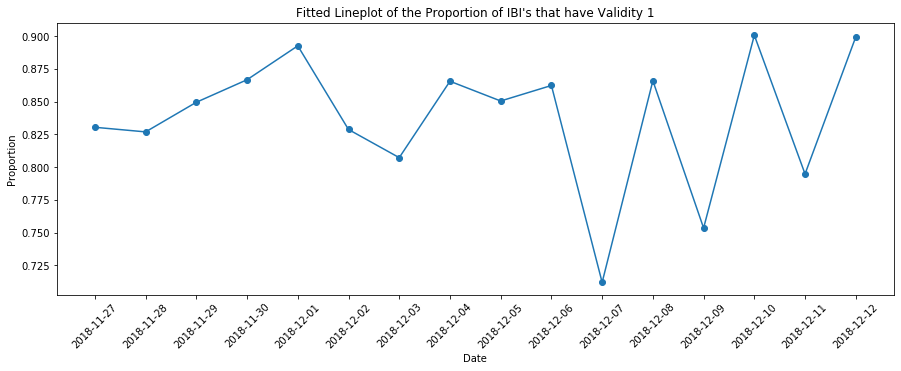

In [10]:
f, ax = plt.subplots(figsize=(15,5))
plt.plot(combined['Date'],combined['Ratio'],'-o')
plt.title('Fitted Lineplot of the Proportion of IBI\'s that have Validity 1');
plt.xlabel('Date');
plt.ylabel('Proportion')
plt.xticks(ticks=combined['Date'],rotation = 45);
# plt.savefig('fitted_ibi_proportions.jpg')


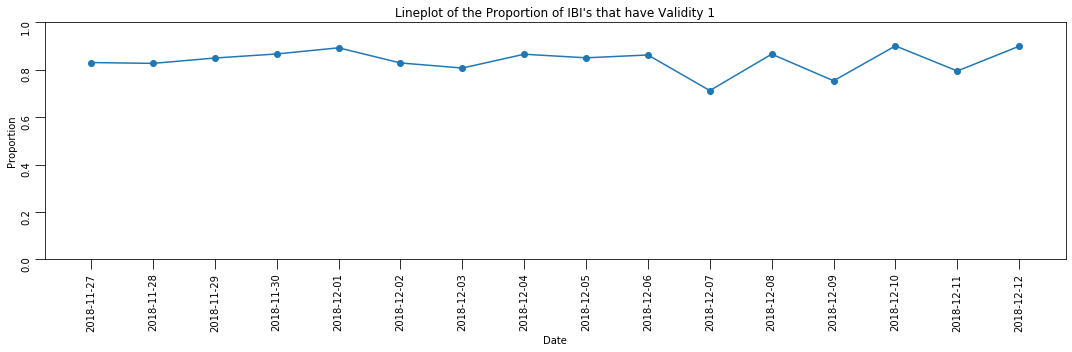

In [17]:
f, ax = plt.subplots(figsize=(15,5))
ax.plot(combined['Date'],combined['Ratio'],'-o')
ax.set_ylim(0,1)
ax.set_title('Lineplot of the Proportion of IBI\'s that have Validity 1');
ax.set_xlabel('Date');
ax.set_ylabel('Proportion');
ax.set_xticks(ticks=combined['Date']);
ax.tick_params(rotation = 90, size = 10)

f.tight_layout()
# plt.savefig('ibi_proportions.jpg')

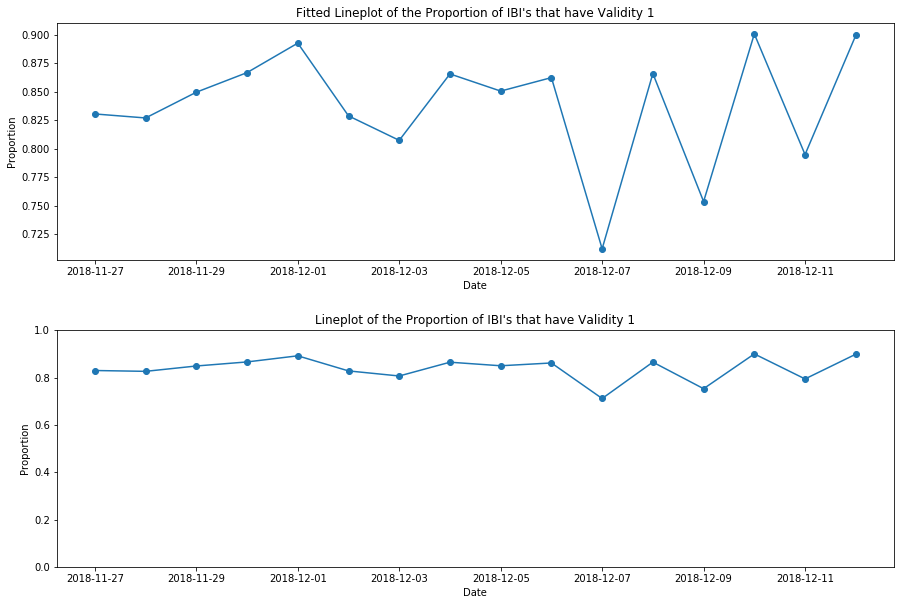

In [142]:
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax.plot(combined['Date'],combined['Ratio'],'-o')
ax.set_title('Fitted Lineplot of the Proportion of IBI\'s that have Validity 1');
ax.set_xlabel('Date');
ax.set_ylabel('Proportion');

ax2.plot(combined['Date'],combined['Ratio'],'-o')
ax2.set_ylim(0,1)
ax2.set_title('Lineplot of the Proportion of IBI\'s that have Validity 1');
ax2.set_xlabel('Date');
ax2.set_ylabel('Proportion');

plt.subplots_adjust(hspace = 0.3)
plt.savefig('side_by_side_proportions_ibi.jpg')

In [101]:
total_num_1 = ibi_data[ibi_data['Validity']==1]
data = [] 
for x in total_num_1['Date'].unique():
    data.append(total_num_1[total_num_1['Date']==x]['Padded IBI'].tolist())

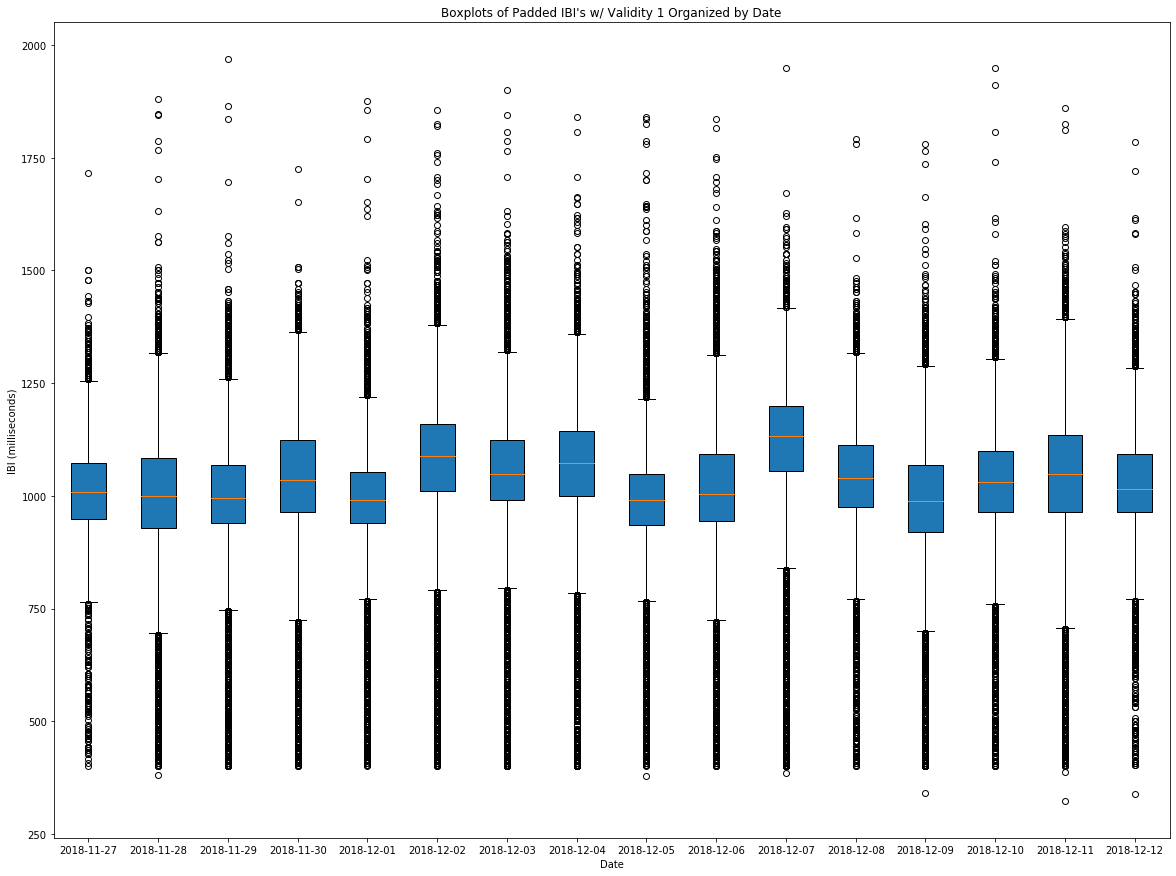

In [120]:
plt.subplots(figsize=(20,15))
labels = [str(x)[:10] for x in total_num_1['Date'].unique()]
plt.boxplot(data,patch_artist=True,labels=labels);
plt.title('Boxplots of Padded IBI\'s w/ Validity 1 Organized by Date');
plt.xlabel('Date');
plt.ylabel('IBI (milliseconds)');
plt.savefig('boxplot_v1.jpg')

In [103]:
medians = total_num_1.groupby('Date')[['Padded IBI']].median().reset_index()
medians.head()

,Date,Padded IBI
0,2018-11-27,1008
1,2018-11-28,1000
2,2018-11-29,996
3,2018-11-30,1036
4,2018-12-01,992


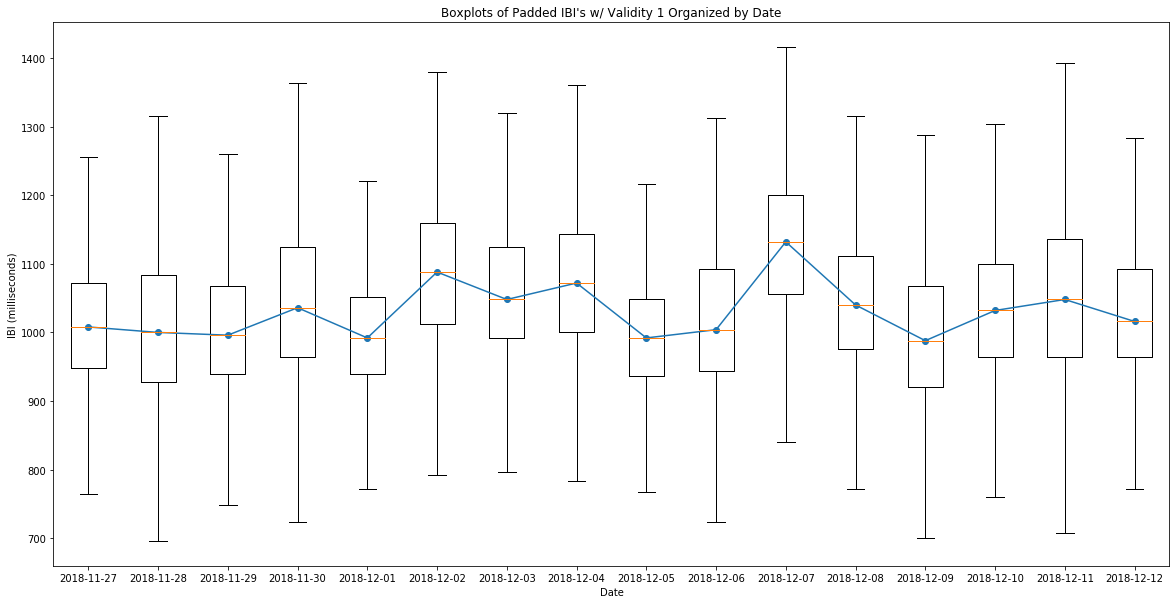

In [121]:
f, ax = plt.subplots(figsize=(20,10))
ax.boxplot(data,labels=labels,showfliers=False);
ax.plot(range(1,len(medians)+1),medians['Padded IBI'],'-o')
ax.set_title('Boxplots of Padded IBI\'s w/ Validity 1 Organized by Date');
ax.set_xlabel('Date');
ax.set_ylabel('IBI (milliseconds)');
plt.savefig('box_plot_v2.jpg')

In [105]:
def sleep_dataset_reader(str_dataset):
    ''' This function takes a string of location of sleep csv and properly formats it to be read as a dataframe.
    Parameters: String, which is the location of the sleep dataset
    Returns: Returns a dataframe with proper format; dataframe does not extend past header columns
    '''
    test = open('scripps1_sleep.csv','r')
    lines = test.readlines()
    length_lines = [len(x.strip().split(';')) for x in lines]
    columns = max(length_lines) 
    list_rows = [] 
    list_sleep_phases = [] 
    for i in lines: 
        list_rows.append(i.strip().split(';'))
        list_sleep_phases.append(i.strip().split(';')[39:])
    list_rows[0].extend(range(len(list_rows[0])-39,columns-39))
    list_rows[0] = list(map(str, list_rows[0]))
    for row in list_rows:
            row.extend(np.nan for x in range(columns-len(row))) # extends rows; for some, 'sleep cycle max' is less than 899
    headers = list_rows.pop(0)
    df = pd.DataFrame(list_rows,columns = headers,dtype='float')
    df.replace(r'^\s*$', np.nan, regex=True, inplace = True) # replaces all the empty spaces with NaN 
    df['list_numbers'] = list_sleep_phases[1:]
    return df

In [106]:
df = sleep_dataset_reader('scripps1_sleep.csv')

In [108]:
interested = df[['Date','Sleep minutes','REM minutes','Light minutes','Deep minutes']]
interested.head()

,Date,Sleep minutes,REM minutes,Light minutes,Deep minutes
0,27.11.2018,4.0,0.0,4.0,0.0
1,27.11.2018,0.0,0.0,0.0,0.0
2,28.11.2018,514.0,212.0,230.0,73.0
3,28.11.2018,10.0,0.0,10.0,0.0
4,29.11.2018,0.0,0.0,0.0,0.0


In [109]:
interested['Date'] = pd.to_datetime(interested['Date'],format="%d.%m.%Y")

/Users/bernardwong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [110]:
totals = interested.groupby('Date').sum().reset_index().sort_values('Date').iloc[1:]
totals.head()

,Date,Sleep minutes,REM minutes,Light minutes,Deep minutes
1,2018-11-28,524.0,212.0,240.0,73.0
2,2018-11-29,420.0,75.0,296.0,49.0
3,2018-11-30,463.0,148.0,225.0,90.0
4,2018-12-01,466.0,209.0,193.0,64.0
5,2018-12-02,511.0,218.0,197.0,96.0


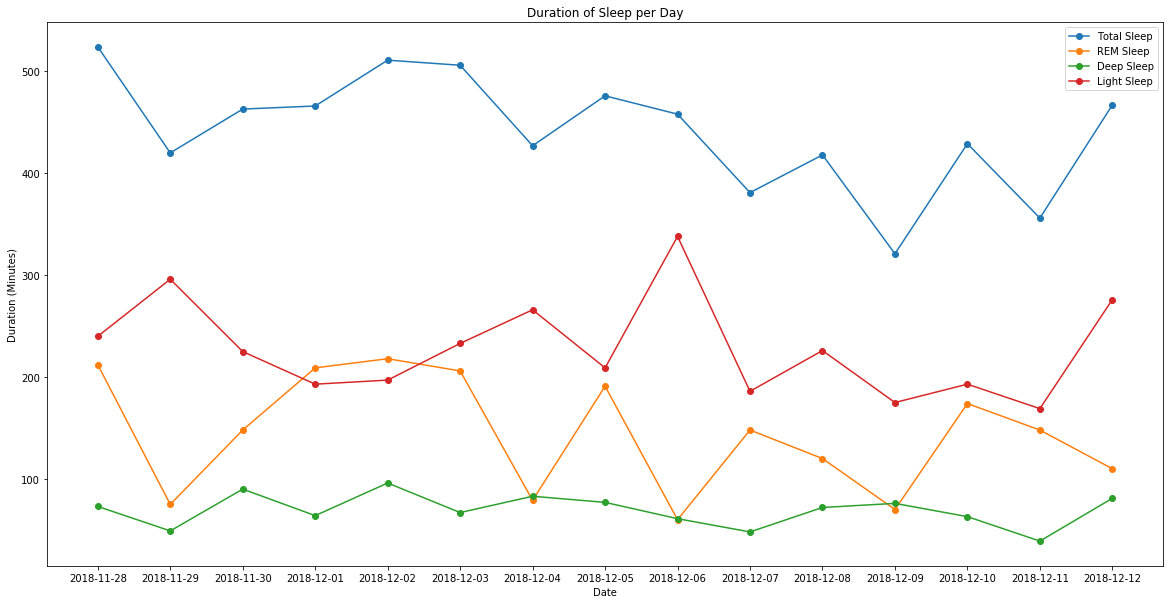

In [122]:
f, ax = plt.subplots(figsize=(20,10))
ax.plot(totals['Date'],totals['Sleep minutes'],'-o',label='Total Sleep')
ax.plot(totals['Date'],totals['REM minutes'],'-o',label='REM Sleep')
ax.plot(totals['Date'],totals['Deep minutes'],'-o',label='Deep Sleep')
ax.plot(totals['Date'],totals['Light minutes'],'-o',label='Light Sleep')
ax.set_xticks(ticks=totals['Date'])
ax.set_title('Duration of Sleep per Day')
ax.set_ylabel('Duration (Minutes)')
ax.set_xlabel('Date')
leg = ax.legend();
plt.savefig('duration_sleep.jpg')

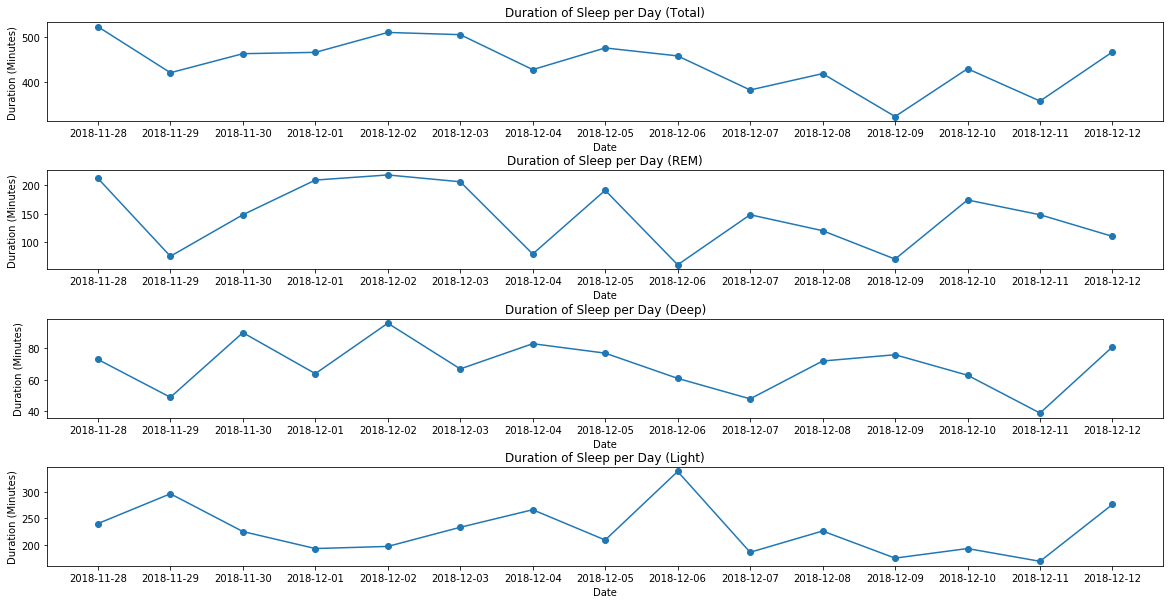

In [162]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(411)
ax2 = f.add_subplot(412)
ax3 = f.add_subplot(413)
ax4 = f.add_subplot(414)

ax1.plot(totals['Date'],totals['Sleep minutes'],'-o',label='Total Sleep')
ax1.set_xticks(ticks=totals['Date'])
ax1.set_title('Duration of Sleep per Day (Total)')
ax1.set_ylabel('Duration (Minutes)')
ax1.set_xlabel('Date')

ax2.plot(totals['Date'],totals['REM minutes'],'-o',label='REM Sleep')
ax2.set_title('Duration of Sleep per Day (REM)')
ax2.set_xticks(ticks=totals['Date'])
ax2.set_ylabel('Duration (Minutes)')
ax2.set_xlabel('Date')

ax3.plot(totals['Date'],totals['Deep minutes'],'-o',label='Deep Sleep')
ax3.set_xticks(ticks=totals['Date'])
ax3.set_title('Duration of Sleep per Day (Deep)')
ax3.set_ylabel('Duration (Minutes)')
ax3.set_xlabel('Date')

ax4.plot(totals['Date'],totals['Light minutes'],'-o',label='Light Sleep')
ax4.set_xticks(ticks=totals['Date'])
ax4.set_title('Duration of Sleep per Day (Light)')
ax4.set_ylabel('Duration (Minutes)')
ax4.set_xlabel('Date')

plt.subplots_adjust(hspace = 0.5)
plt.savefig('duration_sleep_separated.jpg')

In [158]:
medians_copy = medians.iloc[1:]

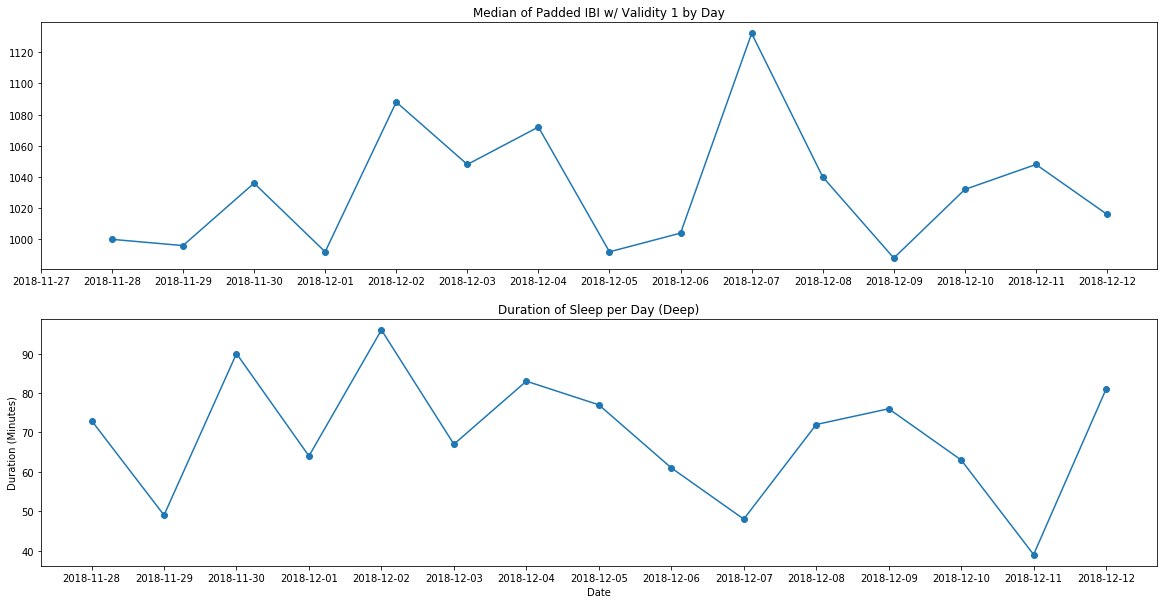

In [163]:
# seems to have an inverse relationship, EXCEPT for the beginning 
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax1.plot(medians_copy['Date'],medians_copy['Padded IBI'],'-o')
ax1.set_xticks(ticks = combined['Date'])
ax1.set_title('Median of Padded IBI w/ Validity 1 by Day')
ax.set_ylabel('IBI (milliseconds)')
ax.set_xlabel('Date')

ax2.plot(totals['Date'],totals['Deep minutes'],'-o',label='Deep Sleep')
ax2.set_xticks(ticks=totals['Date'])
ax2.set_title('Duration of Sleep per Day (Deep)')
ax2.set_ylabel('Duration (Minutes)')
ax2.set_xlabel('Date');


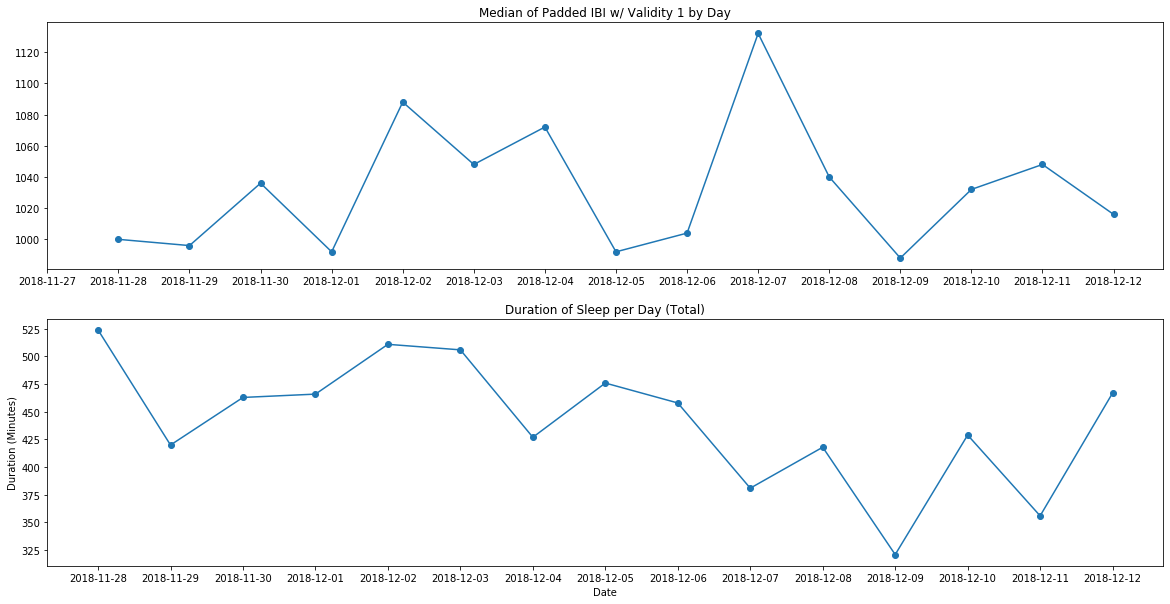

In [166]:
# doesn't seem to have a relationship
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax1.plot(medians_copy['Date'],medians_copy['Padded IBI'],'-o')
ax1.set_xticks(ticks = combined['Date'])
ax1.set_title('Median of Padded IBI w/ Validity 1 by Day')
ax.set_ylabel('IBI (milliseconds)')
ax.set_xlabel('Date')

ax2.plot(totals['Date'],totals['Sleep minutes'],'-o',label='Total Sleep')
ax2.set_xticks(ticks=totals['Date'])
ax2.set_title('Duration of Sleep per Day (Total)')
ax2.set_ylabel('Duration (Minutes)')
ax2.set_xlabel('Date');
